In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt

sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [124]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers[
        "Count"
    ],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"],
}

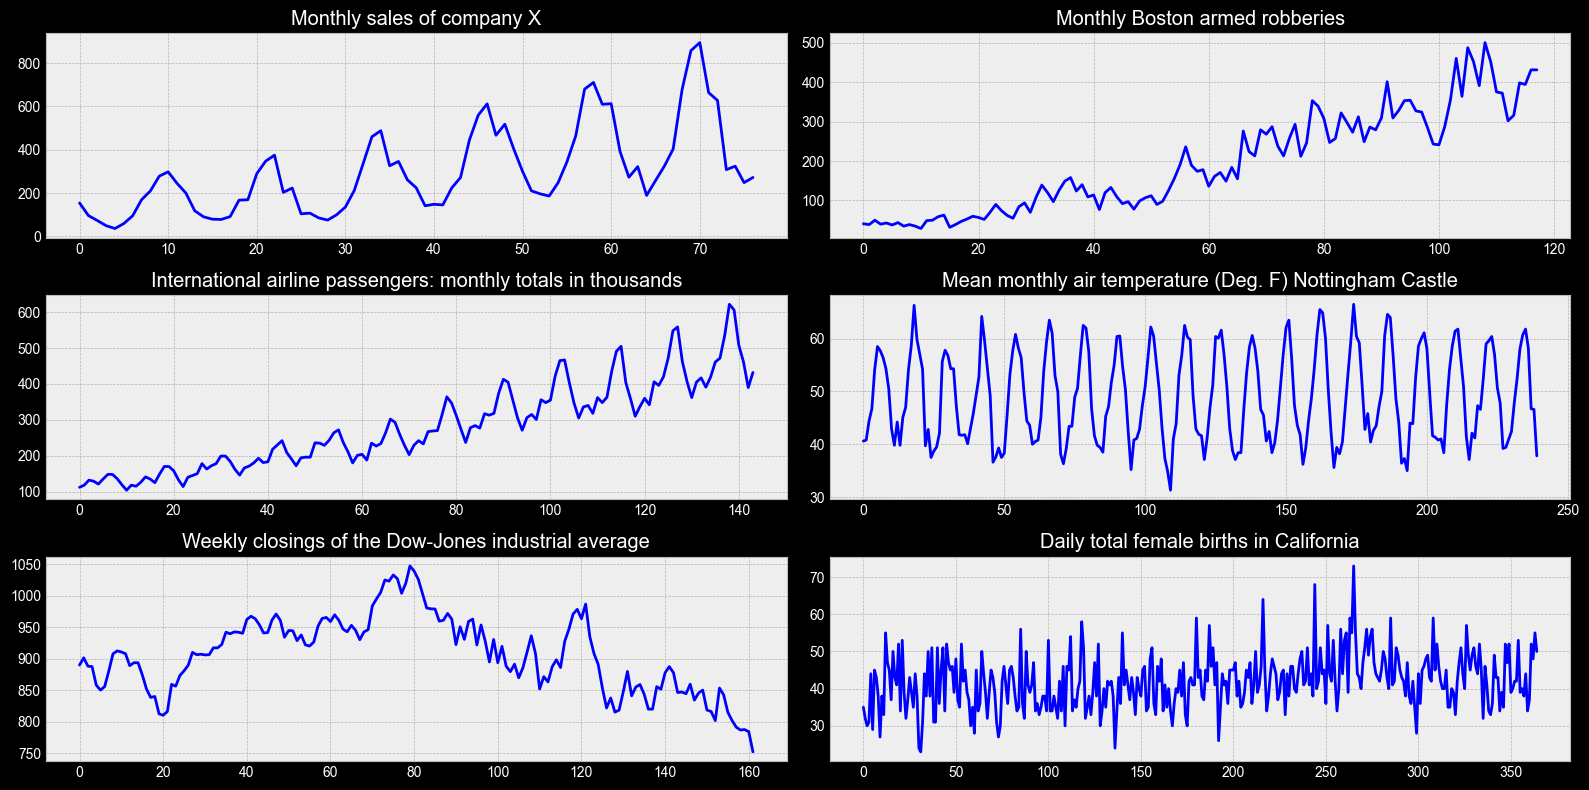

In [125]:
with plt.style.context("bmh"):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color="blue")
        ts_ax.set_title(key)

    plt.tight_layout()

Проверяем стационарность количественно по каждому графику (ADF test)

In [126]:
def check_stationarity(series, name):
    result = adfuller(series.dropna())
    print(f"\n{name}")
    print(f"ADF: {result[0].round(2)}")
    print(f"p-value: {result[1].round(2)}")
    print("Стат значения:")
    for key, value in result[4].items():
        print(f"\t{key}: {value.round(2)}")
    if result[1] <= 0.05:
        print("Датасет стационарен")
    else:
        print("Датасет не стационарен")


for name, series in all_series.items():
    check_stationarity(series, name)


Monthly sales of company X
ADF: 0.65
p-value: 0.99
Стат значения:
	1%: -3.54
	5%: -2.91
	10%: -2.59
Датасет не стационарен

Monthly Boston armed robberies
ADF: 1.0
p-value: 0.99
Стат значения:
	1%: -3.49
	5%: -2.89
	10%: -2.58
Датасет не стационарен

International airline passengers: monthly totals in thousands
ADF: 0.82
p-value: 0.99
Стат значения:
	1%: -3.48
	5%: -2.88
	10%: -2.58
Датасет не стационарен

Mean monthly air temperature (Deg. F) Nottingham Castle
ADF: -3.26
p-value: 0.02
Стат значения:
	1%: -3.46
	5%: -2.87
	10%: -2.57
Датасет стационарен

Weekly closings of the Dow-Jones industrial average
ADF: -1.31
p-value: 0.62
Стат значения:
	1%: -3.47
	5%: -2.88
	10%: -2.58
Датасет не стационарен

Daily total female births in California
ADF: -4.81
p-value: 0.0
Стат значения:
	1%: -3.45
	5%: -2.87
	10%: -2.57
Датасет стационарен


Преобразовываем временные ряды в стационарные (те, которые ими не являются)

In [127]:
log_airlines = np.log(
    airlines_passengers["Count"]
)  # применяем логарифмирование для данного сета так как он растет по экспоненте и дисперсия с течением времени увеличивается - стабилизируем дисперсию
log_diff = log_airlines.diff().dropna()
log_diff_seasonal = log_diff.diff(12).dropna()

check_stationarity(log_diff_seasonal, "Airline passengers stationary")


Airline passengers stationary
ADF: -4.44
p-value: 0.0
Стат значения:
	1%: -3.49
	5%: -2.89
	10%: -2.58
Датасет стационарен


In [128]:
sales_seas_x_log = np.log(sales_of_company_x["Count"])
sales_seas_x = sales_seas_x_log.diff().dropna()

check_stationarity(sales_seas_x, "Sales X stationary")


Sales X stationary
ADF: -3.14
p-value: 0.02
Стат значения:
	1%: -3.54
	5%: -2.91
	10%: -2.59
Датасет стационарен


In [129]:
robberies_in_boston_log = np.log(robberies_in_boston["Count"])
robberies_in_boston_1 = robberies_in_boston_log.diff().dropna()

check_stationarity(robberies_in_boston_1, "Boston robberies stationary")


Boston robberies stationary
ADF: -7.6
p-value: 0.0
Стат значения:
	1%: -3.49
	5%: -2.89
	10%: -2.58
Датасет стационарен


In [130]:
dow_diff = (
    dowjones_closing["Close"].diff().dropna()
)  # у Доу Джонса только цикличность, поэтому лаг в 12 мес не применяем

check_stationarity(temp_seas, "Dow Jones stationary")


Dow Jones stationary
ADF: -6.07
p-value: 0.0
Стат значения:
	1%: -3.46
	5%: -2.88
	10%: -2.57
Датасет стационарен


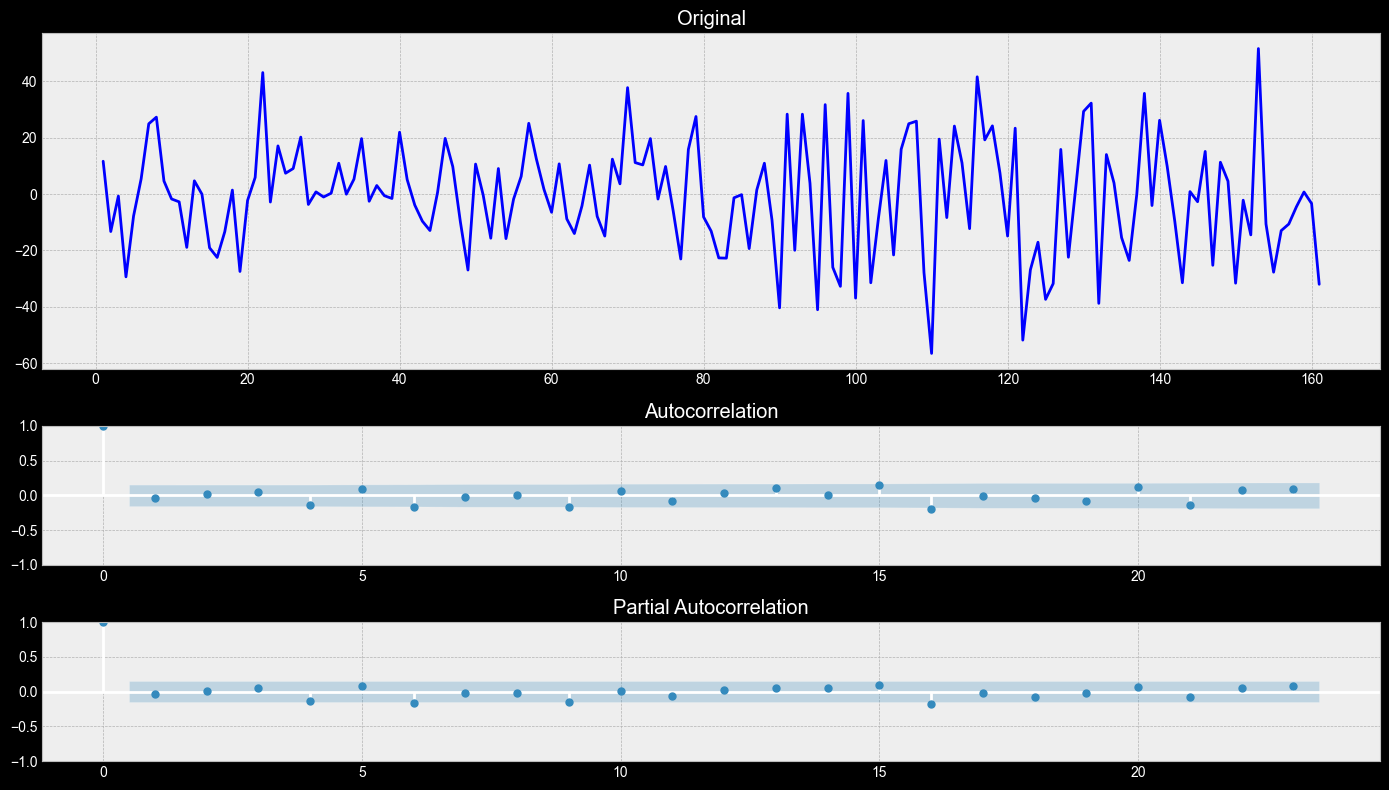

In [131]:
def tsplot(y, lags=None, figsize=(14, 8), style="bmh"):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color="blue", label="Or")
        ts_ax.set_title("Original")

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return


tsplot(dow_diff)

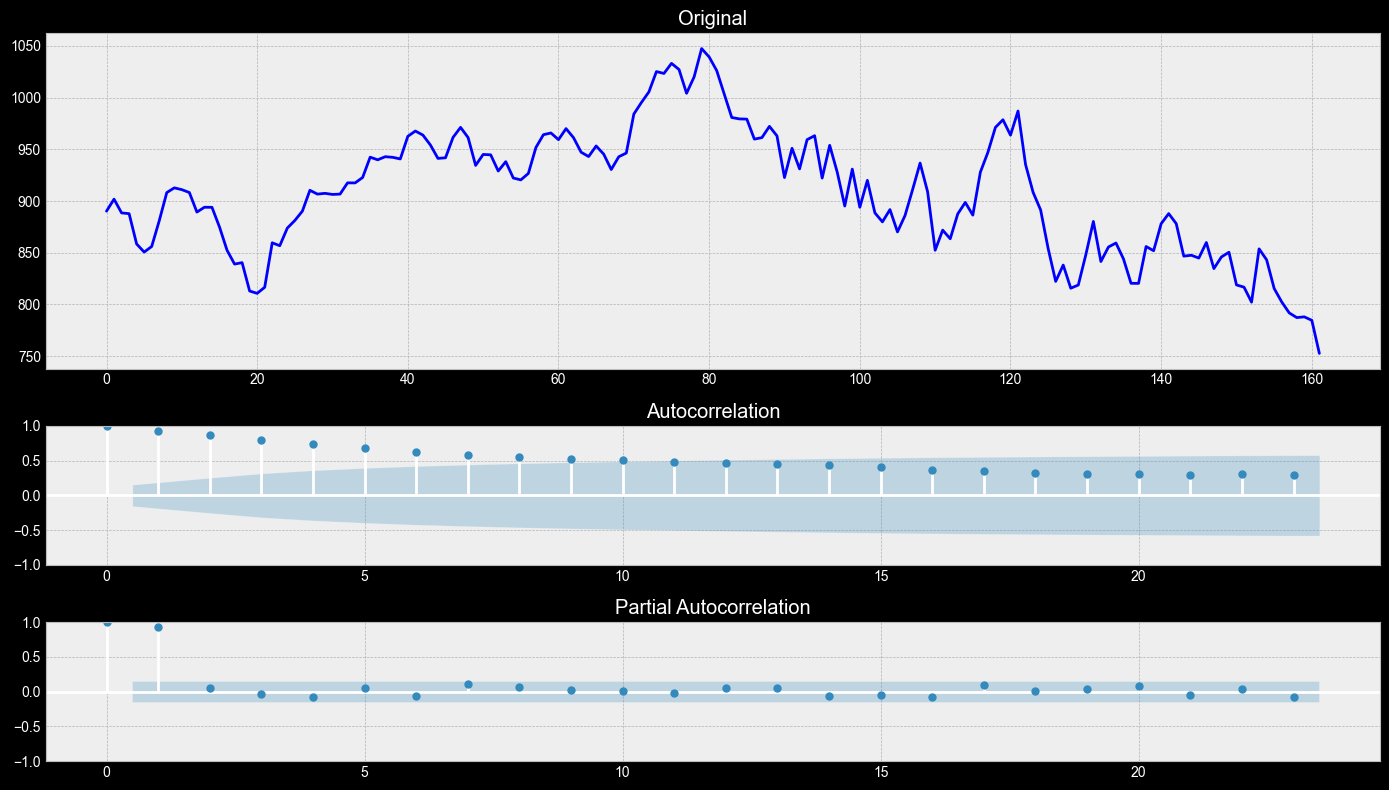

In [132]:
tsplot(dowjones_closing["Close"])